# Falência em Taiwan 🇹🇼

In [22]:
# Import libraries here
import gzip
import json
import pickle
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from ipywidgets import interact
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline

# Preparando Dados

## Importação

### Exercício:
Carregue o conteúdo do arquivo `"data/taiwan-bankruptcy-data.json.gz"` e atribua-o à variável `taiwan_data`.

In [3]:
# Load data file
with gzip.open('/content/taiwan-bankruptcy-data.json.gz','r') as arq:
  taiwan_data = json.load(arq)

print(type(taiwan_data))

<class 'dict'>


### Exercício:
Extraia os nomes das chaves de <code>taiwan_data</code> e atribua-os à variável <code>taiwan_data_keys</code>.

__Dica:__ Os dados nesta tarefa podem estar organizados de forma diferente dos dados do projeto, portanto, certifique-se de inspecioná-los primeiro.

In [4]:
taiwan_data_keys = taiwan_data.keys()
taiwan_data_keys

dict_keys(['schema', 'metadata', 'observations'])

### Exercício:
Calcule quantas empresas estão em `taiwan_data` e atribua o resultado à variável `n_companies`.

In [5]:
n_companies = len(taiwan_data["observations"])
print(n_companies)

6137


### Exercício:
Calcule o número de features associadas a cada empresa e atribua o resultado à variável `n_features`.

In [6]:
n_features = len(taiwan_data["observations"][0])
print(n_features)

97


### Exercício:
Crie uma função `wrangle` que receba como entrada o caminho de um arquivo JSON compactado e retorne o conteúdo do arquivo como um DataFrame. Certifique-se de que o índice do DataFrame contenha o ID das empresas. Quando sua função estiver completa, use-a para carregar os dados no DataFrame `df`.

In [7]:
def wrangle(filepath):
  with gzip.open(filepath,'r') as arq:
    data = json.load(arq)

  df = pd.DataFrame().from_dict(data['observations']).set_index('id')
  return df

In [9]:
df = wrangle('/content/taiwan-bankruptcy-data.json.gz')
print("df shape:", df.shape)
df.info()

df shape: (6137, 96)
<class 'pandas.core.frame.DataFrame'>
Index: 6137 entries, 1 to 6819
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bankrupt  6137 non-null   bool   
 1   feat_1    6137 non-null   float64
 2   feat_2    6137 non-null   float64
 3   feat_3    6137 non-null   float64
 4   feat_4    6137 non-null   float64
 5   feat_5    6137 non-null   float64
 6   feat_6    6137 non-null   float64
 7   feat_7    6137 non-null   float64
 8   feat_8    6137 non-null   float64
 9   feat_9    6137 non-null   float64
 10  feat_10   6137 non-null   float64
 11  feat_11   6137 non-null   float64
 12  feat_12   6137 non-null   float64
 13  feat_13   6137 non-null   float64
 14  feat_14   6137 non-null   float64
 15  feat_15   6137 non-null   float64
 16  feat_16   6137 non-null   float64
 17  feat_17   6137 non-null   float64
 18  feat_18   6137 non-null   float64
 19  feat_19   6137 non-null   float64
 20  feat_20   6137

## Explorar

### Exercício:
Existe algum dado ausente no conjunto de dados? Crie uma Series onde o índice contenha o nome das colunas em `df` e os valores sejam o número de valores <code>NaN</code> em cada coluna. Atribua o resultado à variável <code>nans_by_col</code>. Nem a própria Series nem seu índice precisam de um nome.

In [10]:
nans_by_col = pd.Series(df.isna().sum().values, index=df.columns)
print("nans_by_col shape:", nans_by_col.shape)
nans_by_col.head()

nans_by_col shape: (96,)


,0
bankrupt,0
feat_1,0
feat_2,0
feat_3,0
feat_4,0


### Exercício:
Os dados estão desbalanceados? Crie um gráfico de barras que mostre a contagem de valores normalizados para a coluna `df["bankrupt"]`. Certifique-se de rotular o eixo x como `"Bankrupt"`, o eixo y como `"Frequency"`, e usar o título `"Class Balance"`.

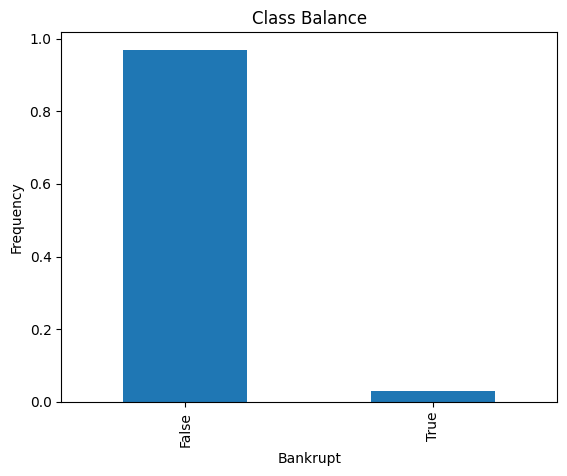

In [12]:
df["bankrupt"].value_counts(normalize=True).plot(
    kind='bar',
    xlabel='Bankrupt',
    ylabel='Frequency',
    title='Class Balance'
);

## Divisão:

### Exercício:
Crie sua matriz de features `X` e o vetor alvo `y`. Seu alvo é `"bankrupt"`.

In [13]:
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6137, 95)
y shape: (6137,)


### Exercício:
Divida seu conjunto de dados em conjuntos de treinamento e teste usando uma divisão aleatória. Seu conjunto de teste deve ser 20% dos seus dados. Certifique-se de definir `random_state` como `42`.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4909, 95)
y_train shape: (4909,)
X_test shape: (1228, 95)
y_test shape: (1228,)


## Resample

### Exercício:
Crie uma nova matriz de features `X_train_over` e um vetor alvo `y_train_over` realizando a sobre-amostragem aleatória nos dados de treinamento. Certifique-se de definir `random_state` como `42`.

In [16]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (9512, 95)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,feat_94,feat_95
0,0.535855,0.599160,0.594411,0.627099,0.627099,0.999220,0.797686,0.809591,0.303518,0.781865,...,0.834091,0.022025,0.624364,0.627101,0.841977,0.275384,0.026791,0.565158,1,0.147943
1,0.554136,0.612734,0.595000,0.607388,0.607388,0.999120,0.797614,0.809483,0.303600,0.781754,...,0.840293,0.002407,0.624548,0.607385,0.842645,0.276532,0.026791,0.565158,1,0.062544
2,0.549554,0.603467,0.599122,0.620166,0.620166,0.999119,0.797569,0.809470,0.303524,0.781740,...,0.840403,0.000840,0.624010,0.620163,0.842873,0.277249,0.026800,0.565200,1,0.047929
3,0.543801,0.603249,0.606992,0.622515,0.622515,0.999259,0.797728,0.809649,0.303510,0.781930,...,0.831514,0.006176,0.626775,0.622513,0.842989,0.280013,0.026839,0.565375,1,0.028386
4,0.498659,0.562364,0.546978,0.603670,0.603670,0.998904,0.797584,0.809459,0.304000,0.781713,...,0.811988,0.004256,0.623674,0.603669,0.841105,0.277628,0.026897,0.565618,1,0.043080


# Construindo Model

## Iterar

### Exercício:
Crie um classificador <code>clf</code> que possa ser treinado em `(X_train_over, y_train_over)`. Você pode usar qualquer um dos novos preditores em conjunto que aprendeu neste projeto.

In [20]:
clf = RandomForestClassifier(random_state=42)

### Exercício:
Realize a validação cruzada com seu classificador usando os dados de treinamento sobre-amostrados e atribua seus resultados à variável <code>cv_scores</code>. Certifique-se de definir o argumento <code>cv</code> como 5.

__Dica:__ Use suas pontuações de validação cruzada para avaliar diferentes classificadores. Escolha o que lhe der os melhores resultados.

In [23]:
cv_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_scores)

[0.99316868 0.99474514 0.99369085 0.99369085 0.9957939 ]


### Exercício:
Crie um dicionário <code>params</code> com a faixa de hiperparâmetros que você deseja avaliar para seu classificador. Se você não tiver certeza de quais hiperparâmetros ajustar, consulte a documentação do scikit-learn para seu preditor em busca de ideias.

__Dica:__ Se o classificador que você construiu for apenas um preditor (não um pipeline com várias etapas), você não precisa incluir o nome da etapa nas chaves do seu dicionário <code>params</code>.

Por exemplo, se seu classificador for apenas uma floresta aleatória (não um pipeline contendo uma floresta aleatória), você acessaria o número de estimadores usando <code>"n_estimators"</code>, e não <code>"randomforestclassifier__n_estimators"</code>.

In [24]:
params = {
    'n_estimators': range(25,100,25),
    'max_depth': range(10, 50, 10)
}

### Exercício:
Crie um <code>GridSearchCV</code> chamado `model` que inclua seu classificador e a grade de hiperparâmetros. Certifique-se de definir `cv` como 5, `n_jobs` como -1 e `verbose` como 1.

In [25]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

### Exercício  
Ajuste seu modelo aos dados de treinamento **sobre-amostrados.**

In [26]:
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

### Exercício:
Extraia os resultados da validação cruzada do seu modelo e carregue-os em um DataFrame chamado <code>cv_results</code>. Observando os resultados, qual conjunto de hiperparâmetros levou ao melhor desempenho?

In [27]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.783450,0.214452,0.028402,0.008390,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.981608,0.980032,0.979495,0.981073,0.980547,0.980551,0.000745,11
1,2.183048,0.284339,0.020819,0.000970,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.983184,0.981608,0.977918,0.980021,0.981073,0.980761,0.001750,10
2,3.734103,0.811905,0.032484,0.013686,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.983184,0.981083,0.977392,0.979495,0.981073,0.980445,0.001925,12
3,1.463952,0.423724,0.020681,0.009417,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.990541,0.986863,0.985804,0.990011,0.989485,0.988541,0.001863,9
4,2.413045,0.054431,0.024328,0.001406,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.990541,0.990016,0.987907,0.990011,0.990011,0.989697,0.000918,7


### Exercício:
Extraia os melhores hiperparâmetros do seu modelo e atribua-os à variável <code>best_params</code>.

In [28]:
best_params = model.best_params_
print(best_params)

{'max_depth': 40, 'n_estimators': 75}


## Avaliar

### Exercício:
Teste a qualidade do seu modelo calculando as pontuações de precisão para os dados de treinamento e teste.

In [29]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Model Training Accuracy:", round(acc_train, 4))
print("Model Test Accuracy:", round(acc_test, 4))

Model Training Accuracy: 1.0
Model Test Accuracy: 0.9764


### Exercício:
Plote uma matriz de confusão que mostre como seu modelo se desempenhou em seu conjunto de teste.

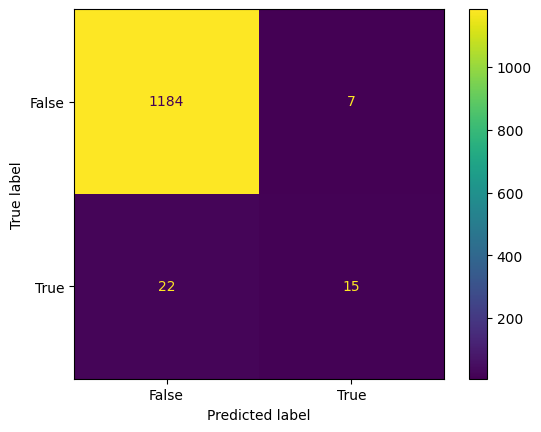

In [30]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

### Exercício:
Gere um relatório de classificação para o desempenho do seu modelo nos dados de teste e atribua-o à variável `class_report`.

In [31]:
class_report = classification_report(y_test, model.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

       False       0.98      0.99      0.99      1191
        True       0.68      0.41      0.51        37

    accuracy                           0.98      1228
   macro avg       0.83      0.70      0.75      1228
weighted avg       0.97      0.98      0.97      1228



# Comunicar Resultados

### Exercício:
Crie um gráfico de barras horizontal com as 10 características mais importantes para o seu modelo. Certifique-se de rotular o eixo x como `"Gini Importance"`, o eixo y como `"Feature"` e usar o título `"Feature Importance"`.

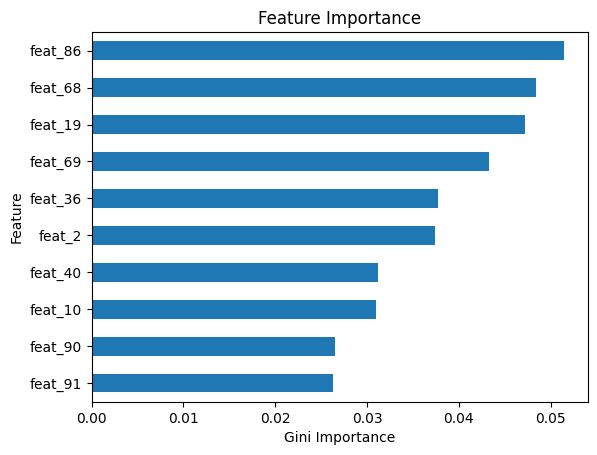

In [34]:
features = X_train.columns
importances = model.best_estimator_.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values()

feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

### Exercício:
Salve seu modelo de melhor desempenho em um arquivo nomeado <code>"model-5-5.pkl"</code>.

In [37]:
# Save model
with open('model.pkl','wb') as arq:
  pickle.dump(model, arq)

### Exercício:
Abra o arquivo <code>my_predictor_assignment.py</code>. Adicione sua função `wrangle` e, em seguida, crie uma função `make_predictions` que recebe dois argumentos: `data_filepath` e <code>model_filepath</code>. Use a célula abaixo para testar seu módulo. Quando estiver satisfeito com o resultado, envie-o para o avaliador.

In [41]:
# Import your module
from my_predictor import make_predictions

# Generate predictions
y_test_pred = make_predictions(
    data_filepath="/content/taiwan-bankruptcy-data-test-features.json.gz",
    model_filepath="model.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

predictions shape: (682,)


,bankrupt
id,
18,False
20,False
24,False
32,False
38,False


<div class="alert alert-info" role="alert">
    <b>Dica:</b> Se você receber um <code style="color:#E45E5C;background-color:#FEDDDE">ImportError</code> ao tentar importar <code>make_predictions</code> de <code>my_predictor_assignment</code>, tente reiniciar seu kernel. Vá ao menu <b>Kernel</b> e clique em <b>Reiniciar Kernel e Limpar Todas as Saídas</b>. Em seguida, execute apenas a célula acima. ☝️
</div>